In [231]:
# library
import matplotlib.pyplot as plt
import pandas as pd
from rake_nltk import Rake
from tika import parser
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [232]:
def document_to_text(document_path):
    parsed = parser.from_file(document_path)
    text = parsed['content']
    if parsed['content'] == None:
        print("The submitted document cannot be read.")
    try:
        text = text.replace('\n', '')
    except:
        pass
    return text

In [233]:
def compile_document_text(text):
    job_descriptions = pd.read_csv('data/job_descriptions.csv', index_col=0)
    data = [['resume', text]]
    basic_documentdf = pd.DataFrame(data, columns = ['title', 'description'])
    return basic_documentdf

In [234]:
def text_to_bagofwords(df):
    df['rake_key_words'] = ''
    r = Rake()
    for index, row in df.iterrows():
        r.extract_keywords_from_text(row['description'])
        key_words_dict_scores = r.get_word_degrees()
        row['rake_key_words'] = list(key_words_dict_scores.keys())
# Transform key words into bag of words
    df['bag_of_words'] = ''
    for index, row in df.iterrows():
        words = ''
        words += ' '.join(row['rake_key_words']) + ' '
        row['bag_of_words'] = words
    verbose_documentdf = df
    return verbose_documentdf

In [235]:
def join_and_condense(df):
    job_descriptions = pd.read_csv('data/job_descriptions.csv', index_col=0)
    job_descriptions = job_descriptions.append(df)
    recommend_df = job_descriptions[['title', 'bag_of_words']]
    recommend_df = recommend_df.reset_index(drop=True)
    return recommend_df

In [236]:
def vectorize_text(df):
    count = CountVectorizer()
    count_matrix = count.fit_transform(df['bag_of_words'])
    cosine_sim = cosine_similarity(count_matrix, count_matrix)
    return cosine_sim

In [237]:
def recommend_100(df, matrix):
    recommended_jobs = []
    indices = pd.Series(df['title'])
    idx = indices[indices == 'resume'].index[0]
    score_series = pd.Series(matrix[idx]).sort_values(ascending = False)
    top_100_indices = list(score_series.iloc[1:101].index)

    for i in top_100_indices:
        recommended_jobs.append(list(df['title'])[i])

    return recommended_jobs

In [238]:
def format_recommendations(recommendations):
    jobs10 = []
    for job in recommendations:
        job = job.lower().replace("_", " ").title()
        job = job.replace('Hr Manager', 'HR Manager')
        jobs10.append(job)
    jobs10 = set(jobs10[0:30])
    jobs10 = list(jobs10)
    final_jobs10 = jobs10[0:10]
    for i, item in enumerate(final_jobs10, 1):
        print(i, '. ' + item + '\n', sep='',end='')
    return final_jobs10

In [239]:
def top_100_categories(recommendations):
    df = pd.read_csv('data/job_descriptions.csv', index_col=0)
    user_titles = df[df.title.isin(recommendations)]
    user_titles = user_titles[['title', 'category']]

#     user_titles = user_titles.drop_duplicates(subset="title", keep="last")
    category_list = list(user_titles.category)
    return category_list

In [240]:
def freq(list_of_categories):
    frequency = []
    unique_words = set(list_of_categories)
    for words in unique_words :
        frequency.append(list_of_categories.count(words))
    return frequency

In [241]:
def viz_data(list_of_categories, frequency_of_categories):
    unique_words = set(list_of_categories)
    unique_words = list(unique_words)
    category_values = dict(zip(unique_words, frequency_of_categories))
    category_dict = {key:val for key, val in category_values.items() if val >= 10}
    names=category_dict.keys()
    size=category_dict.values()
    return names, size

In [242]:
def make_viz(names_of_categories, size_of_categories):
# Create a circle for the center of the plot
    my_circle=plt.Circle( (0,0), 0.7, color='white')
# Give color names
    plt.title('Strength Summary')
    plt.pie(size_of_categories, labels=names_of_categories)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()

0                     training_manager
1                     training_manager
2                     training_manager
3                     training_manager
4                     training_manager
                    ...               
261                youth services aide
262             nutritionist associate
263    Licensed Real Estate SalesAgent
264                Sterile Supply Tech
265                             resume
Name: title, Length: 266, dtype: object
265
265    1.000000
59     0.166790
51     0.164310
52     0.161649
53     0.151894
         ...   
193    0.007303
27     0.000000
253    0.000000
191    0.000000
264    0.000000
Length: 266, dtype: float64
[59, 51, 52, 53, 57, 56, 55, 54, 50, 58, 75, 158, 34, 5, 213, 45, 217, 39, 2, 139, 235, 86, 182, 247, 46, 234, 79, 0, 250, 246, 260, 84, 120, 140, 222, 113, 31, 119, 127, 244, 23, 63, 62, 87, 80, 106, 92, 3, 18, 60, 85, 78, 10, 215, 101, 1, 201, 137, 233, 128, 263, 105, 74, 14, 168, 174, 154, 167, 82, 9, 7, 151, 21, 230, 

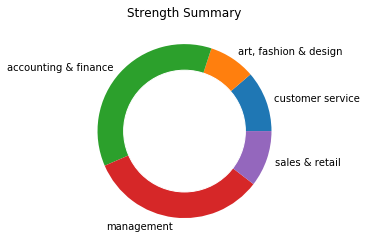

,title,bag_of_words
0,training_manager,provide limited express interest additional tr...
1,training_manager,workshops including schedules integrity respon...
2,training_manager,oversee translate diverse audience advanced kn...
3,training_manager,public speaking • enjoy getting previous exper...
4,training_manager,luxury business pr teams powerpoint paced envi...
...,...,...
261,youth services aide,time position placed may apply directly locate...
262,nutritionist associate,time position local health agency professional...
263,Licensed Real Estate SalesAgent,integrity career online commission region pers...
264,Sterile Supply Tech,ged required sterilize instrument sets surgery...


In [243]:

resume_text = document_to_text(document_path)
basic_documentdf = compile_document_text(resume_text)

verbose_documentdf = text_to_bagofwords(basic_documentdf)
recommend_df = join_and_condense(verbose_documentdf)

cosine_sim = vectorize_text(recommend_df)
recommended_jobs = recommend_100(recommend_df, cosine_sim)

final_jobs10 = format_recommendations(recommended_jobs)
category_list = top_100_categories(recommended_jobs)
frequency = freq(category_list)
names, size = viz_data(category_list, frequency)
strength_summary = make_viz(names, size)
recommend_df

In [244]:
def analyze(document_path):
    resume_text = document_to_text(document_path)
    basic_documentdf = compile_document_text(resume_text)
    verbose_documentdf = text_to_bagofwords(basic_documentdf)
    recommend_df = join_and_condense(verbose_documentdf)
    cosine_sim = vectorize_text(recommend_df)
    recommended_jobs = recommend_100(recommend_df, cosine_sim)

    final_jobs10 = format_recommendations(recommended_jobs)
    category_list = top_100_categories(recommended_jobs)
    frequency = freq(category_list)
    names, size = viz_data(category_list, frequency)
    strength_summary = make_viz(names, size)

In [245]:
def final_rec(document_path):
    text = document_to_text(document_path)
    basic_documentdf = compile_document_text(text)
    verbose_documentdf = text_to_bagofwords(basic_documentdf)
    recommend_df = join_and_condense(verbose_documentdf)
    cosine_sim = vectorize_text(recommend_df)
    recommended_jobs = recommend_100(document_path, 'resume', cosine_sim)
    recommendations = format_recommendations(recommended_jobs)
    return recommendations

0                     training_manager
1                     training_manager
2                     training_manager
3                     training_manager
4                     training_manager
                    ...               
261                youth services aide
262             nutritionist associate
263    Licensed Real Estate SalesAgent
264                Sterile Supply Tech
265                             resume
Name: title, Length: 266, dtype: object
265
265    1.000000
74     0.158018
79     0.120629
13     0.118687
188    0.118017
         ...   
159    0.000000
145    0.000000
143    0.000000
107    0.000000
173    0.000000
Length: 266, dtype: float64
[74, 79, 13, 188, 182, 119, 158, 72, 185, 9, 123, 58, 130, 222, 40, 90, 42, 11, 70, 128, 87, 56, 3, 30, 233, 250, 80, 66, 76, 39, 78, 215, 117, 16, 92, 189, 247, 31, 111, 5, 2, 82, 113, 18, 7, 178, 140, 0, 216, 6, 127, 94, 81, 8, 167, 239, 49, 175, 34, 75, 19, 235, 132, 161, 213, 71, 73, 17, 86, 57, 10, 1, 93, 217, 32, 14

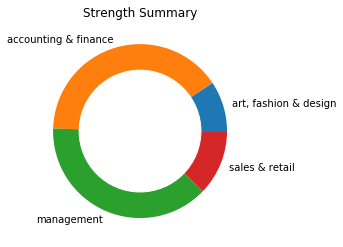

In [246]:
document_path = (r"C:\Users\sambe\Desktop\Resume_May2020.pdf")
analyze(document_path)

0                     training_manager
1                     training_manager
2                     training_manager
3                     training_manager
4                     training_manager
                    ...               
261                youth services aide
262             nutritionist associate
263    Licensed Real Estate SalesAgent
264                Sterile Supply Tech
265                             resume
Name: title, Length: 266, dtype: object
265
265    1.000000
87     0.187561
94     0.183434
80     0.174721
93     0.170176
         ...   
212    0.008254
196    0.007775
109    0.007721
206    0.000000
169    0.000000
Length: 266, dtype: float64
[87, 94, 80, 93, 60, 91, 96, 6, 92, 15, 185, 97, 63, 62, 82, 200, 61, 236, 86, 85, 140, 1, 69, 84, 158, 117, 12, 18, 83, 189, 247, 90, 235, 5, 36, 64, 199, 10, 135, 240, 23, 99, 68, 111, 114, 30, 66, 250, 34, 238, 81, 119, 95, 11, 188, 155, 229, 263, 13, 49, 0, 19, 67, 113, 38, 110, 39, 89, 17, 182, 14, 73, 127, 35, 130, 

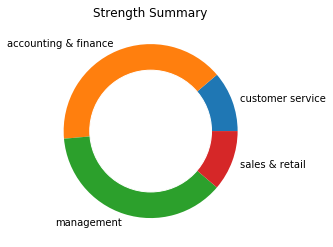

In [247]:
document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeAbdulAlbab.pdf")
analyze(document_path)

0                     training_manager
1                     training_manager
2                     training_manager
3                     training_manager
4                     training_manager
                    ...               
261                youth services aide
262             nutritionist associate
263    Licensed Real Estate SalesAgent
264                Sterile Supply Tech
265                             resume
Name: title, Length: 266, dtype: object
265
265    1.000000
60     0.161349
93     0.157919
92     0.155758
12     0.152177
         ...   
264    0.010639
212    0.000000
209    0.000000
259    0.000000
147    0.000000
Length: 266, dtype: float64
[60, 93, 92, 12, 91, 96, 97, 84, 80, 238, 35, 15, 34, 1, 6, 95, 66, 82, 19, 99, 62, 63, 185, 64, 0, 13, 90, 94, 23, 68, 36, 18, 128, 250, 69, 61, 199, 65, 17, 85, 33, 158, 86, 41, 11, 140, 189, 120, 117, 229, 119, 228, 113, 5, 217, 72, 237, 89, 127, 234, 200, 105, 161, 39, 154, 10, 263, 31, 247, 124, 235, 40, 111, 7, 46, 

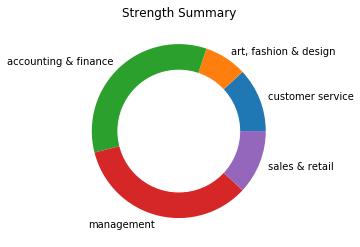

In [248]:
document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeAhmadPirzada.pdf")
analyze(document_path)

0                     training_manager
1                     training_manager
2                     training_manager
3                     training_manager
4                     training_manager
                    ...               
261                youth services aide
262             nutritionist associate
263    Licensed Real Estate SalesAgent
264                Sterile Supply Tech
265                             resume
Name: title, Length: 266, dtype: object
265
265    1.000000
80     0.168051
92     0.154479
93     0.151458
60     0.150449
         ...   
264    0.011054
145    0.009278
209    0.007754
212    0.007754
196    0.007304
Length: 266, dtype: float64
[80, 92, 93, 60, 66, 35, 94, 97, 91, 99, 12, 15, 95, 63, 62, 65, 90, 96, 111, 0, 82, 240, 110, 119, 18, 6, 68, 64, 23, 113, 158, 117, 84, 61, 128, 33, 5, 140, 155, 13, 182, 235, 86, 11, 30, 73, 199, 185, 87, 34, 7, 236, 49, 232, 69, 189, 229, 176, 263, 83, 127, 28, 42, 78, 214, 1, 105, 39, 100, 14, 250, 10, 114, 8, 247, 1

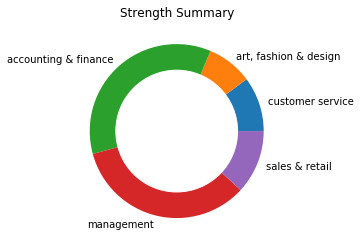

In [249]:
document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeAteliaDeaza.pdf")
analyze(document_path)

0                     training_manager
1                     training_manager
2                     training_manager
3                     training_manager
4                     training_manager
                    ...               
261                youth services aide
262             nutritionist associate
263    Licensed Real Estate SalesAgent
264                Sterile Supply Tech
265                             resume
Name: title, Length: 266, dtype: object
265
265    1.000000
73     0.123045
80     0.107763
65     0.104934
106    0.101015
         ...   
221    0.000000
169    0.000000
171    0.000000
173    0.000000
179    0.000000
Length: 266, dtype: float64
[73, 80, 65, 106, 104, 217, 75, 250, 260, 86, 109, 119, 95, 254, 64, 59, 168, 99, 58, 12, 79, 214, 19, 70, 115, 97, 63, 62, 2, 74, 225, 188, 61, 78, 101, 9, 148, 108, 140, 45, 123, 226, 5, 34, 82, 81, 66, 36, 54, 50, 84, 13, 236, 238, 232, 118, 176, 216, 33, 77, 113, 55, 76, 67, 89, 175, 135, 220, 60, 194, 158, 215, 18, 5

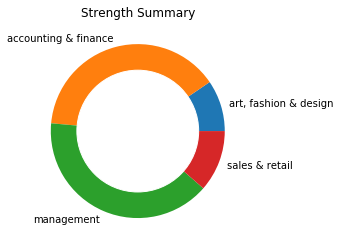

In [250]:
document_path = (r"C:\Users\sambe\Downloads\Resume.pdf")
analyze(document_path)

0                     training_manager
1                     training_manager
2                     training_manager
3                     training_manager
4                     training_manager
                    ...               
261                youth services aide
262             nutritionist associate
263    Licensed Real Estate SalesAgent
264                Sterile Supply Tech
265                             resume
Name: title, Length: 266, dtype: object
265
265    1.000000
59     0.166790
51     0.164310
52     0.161649
53     0.151894
         ...   
193    0.007303
27     0.000000
253    0.000000
191    0.000000
264    0.000000
Length: 266, dtype: float64
[59, 51, 52, 53, 57, 56, 55, 54, 50, 58, 75, 158, 34, 5, 213, 45, 217, 39, 2, 139, 235, 86, 182, 247, 46, 234, 79, 0, 250, 246, 260, 84, 120, 140, 222, 113, 31, 119, 127, 244, 23, 63, 62, 87, 80, 106, 92, 3, 18, 60, 85, 78, 10, 215, 101, 1, 201, 137, 233, 128, 263, 105, 74, 14, 168, 174, 154, 167, 82, 9, 7, 151, 21, 230, 

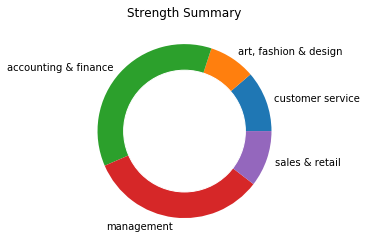

In [251]:
document_path = (r"C:\Users\sambe\Desktop\david-powell-resume-2018.pdf")
analyze(document_path)

In [252]:
def top10(document_path):
    document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeBrittanyMouzoon.pdf")
    text = document_to_text(document_path)
#     print("Extracting text from document...")
    basic_documentdf = compile_document_text(text)
#     print("Creating dataframe...")
    verbose_documentdf = text_to_bagofwords(basic_documentdf)
#     print("Extracting key words from text...")
    recommend_df = join_and_condense(verbose_documentdf)
#     print("Compiling data...")
    cosine_sim = vectorize_text(recommend_df)
#     print("Calculating similarities...")
    recommended_jobs = recommend_100('resume', cosine_sim)
#     print("Retrieving top recommendations...")
    recommendations = format_recommendations(recommended_jobs)
    return recommendations